# Homework SML1 - Degonzague Alice

### Exercise 2 page 52 

For each scenario : Classification or Regression ? Inference or Prediction ? Provide n and p :

(a) This is a regression problem, we want to model the relationship between a dependent variable (CEO salary) and multiple independent variables. We are interested in inference, understanding which factors affect CEO salary and not predict the salary.
n = 500 (number of firms)
p = 3 (number of variables recorded for each firm)

(b) This is a classification problem as we want to train the model to correctly predict the class label (success or failure). We are interested in prediction, predicting whether the new product will be a success or failure.
n = 20 (number of similar products)
p = 13 (number of variables recorded for each product)

(c) This is also a regression problem, we want to model the relationship between a continuous dependent variable ( % change in the USD/Euro exchange rate) and multiple independent variables. We are interested in prediction, predicting the % change in the USD/Euro exchange rate.
n = 52 (number of weeks in 2012)
p = 4 (number of variables recorded for each week)

### Exercise 10 page 56

(a) How many rows are in this data set? How many columns? What do the rows and columns represent?

*The Boston data set in the ISLR2 library contains 506 rows (suburbs of Boston) and 14 columns. The rows represent observations of different census tracts in the Boston area and the columns represent different predictor variables such as crime rate, average number of rooms per dwelling, etc.*

*crim: per capita crime rate by town.*

*zn: proportion of residential land zoned for lots over 25,000 sq.ft.*

*indus: proportion of non-retail business acres per town.*

*chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).*

*nox: nitrogen oxides concentration (parts per 10 million).*

*rm: average number of rooms per dwelling.*

*age: proportion of owner-occupied units built prior to 1940.*

*dis: weighted mean of distances to five Boston employment centres.*

*rad: index of accessibility to radial highways.*

*tax: full-value property-tax rate per $10,000.*

*ptratio: pupil-teacher ratio by town.*

*lstat: lower status of the population (percent).*

*medv: median value of owner-occupied homes in $1000s.*


In [26]:
library(ISLR2)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

*Here, we find that the number of rooms per dwelling (rm) is positively correlated with the median value of owner-occupied homes (medv). This means that as the number of rooms per dwelling increases, the median value of owner-occupied homes is also likely to increase.
Also, we find that the crime rate (crim) is negatively correlated with the median value of owner-occupied homes (medv). This means that as the crime rate increases, the median value of owner-occupied homes is likely to decrease.*

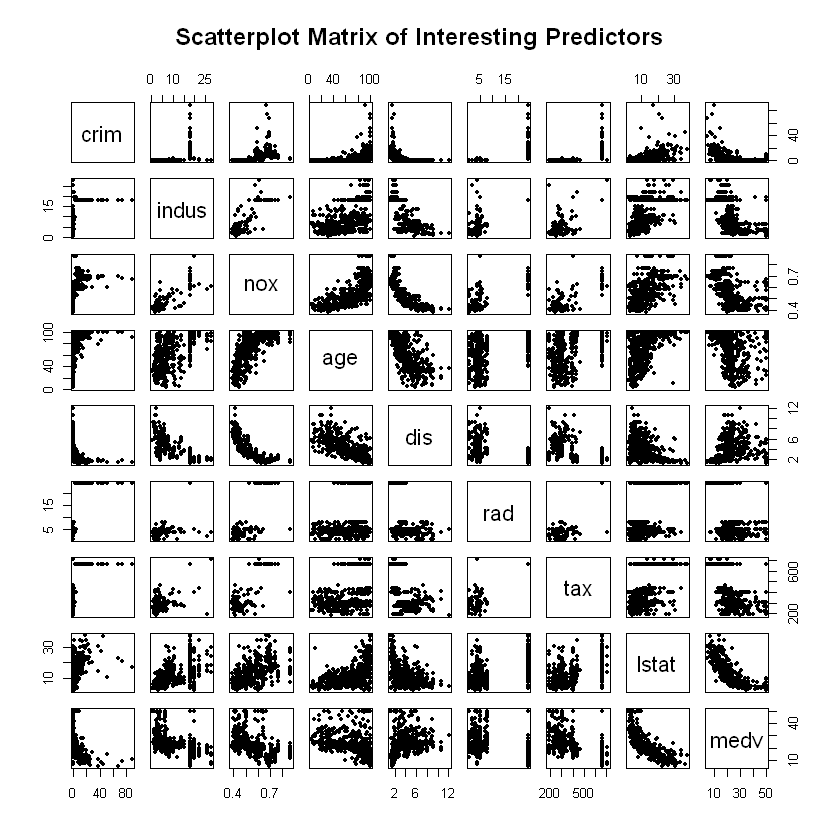

In [34]:
pairs(Boston)

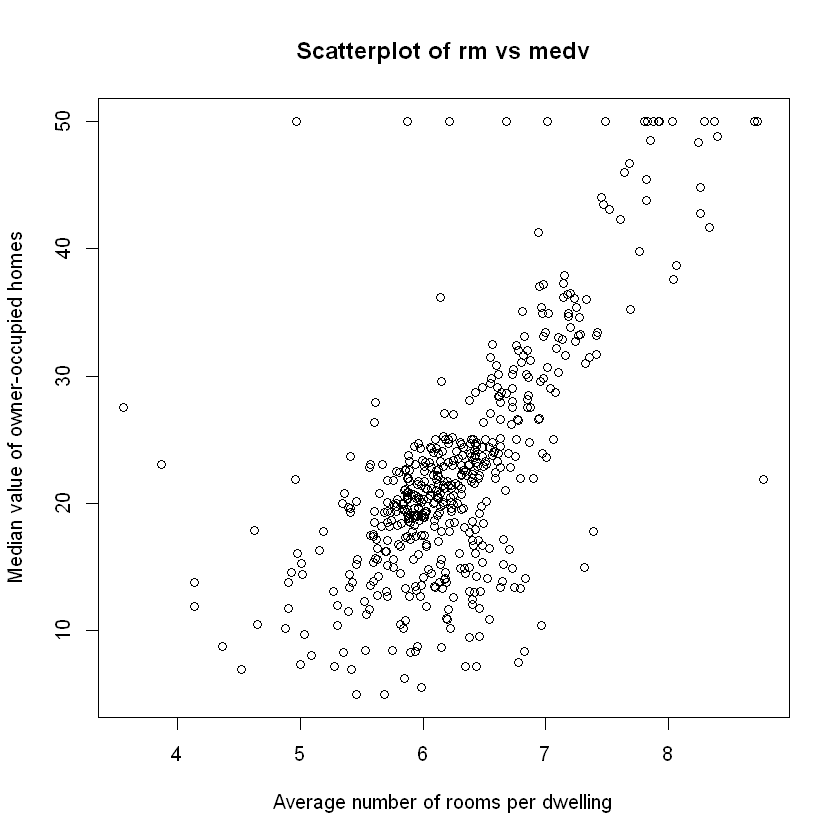

In [29]:
plot(Boston$rm, Boston$medv, xlab="Average number of rooms per dwelling", ylab="Median value of owner-occupied homes", main="Scatterplot of rm vs medv")


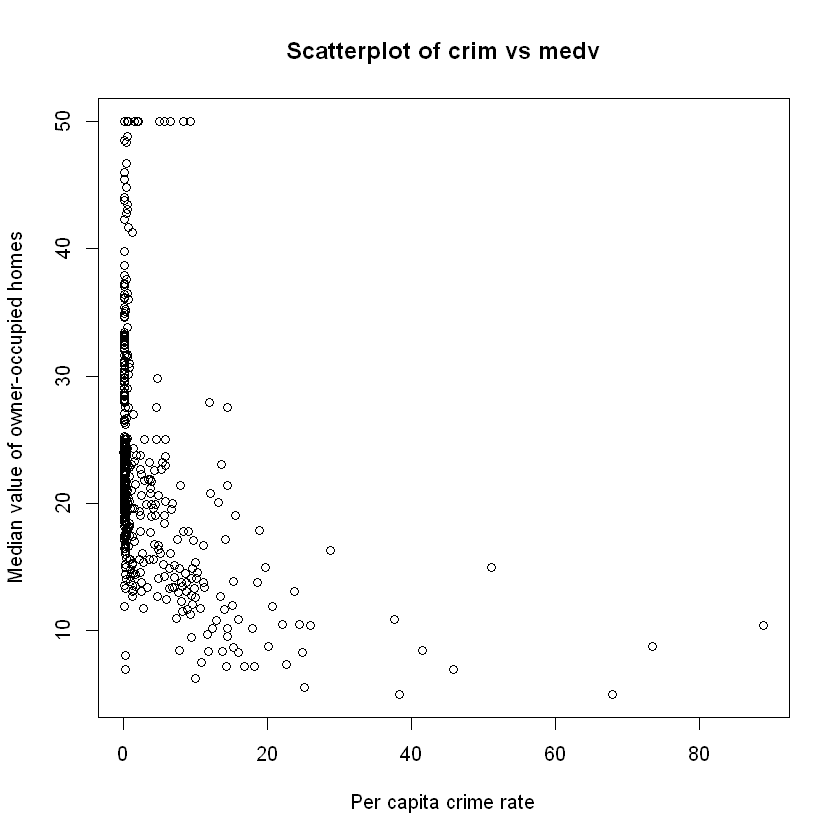

In [30]:
plot(Boston$crim, Boston$medv, xlab="Per capita crime rate", ylab="Median value of owner-occupied homes", main="Scatterplot of crim vs medv")

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

*The first row of the correlation matrix corresponds to the correlations between the per capita crime rate and each of the other predictors.* 

*Personnal reminder: A positive correlation indicates that as the value of one variable increases, the value of the other variable is also likely to increase. A negative correlation indicates that as the value of one variable increases, the value of the other variable is likely to decrease. The strength of the correlation is indicated by the magnitude of the correlation coefficient, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation).*

*Here, we find that the predictor with the highest positive correlation with the per capita crime rate is the index of accessibility to radial highways (rad). This suggest that the crime rate is higher in areas of Boston that are more accessible by radial highways. Conversely, you might find that the predictor with the highest negative correlation with the per capita crime rate is the average number of rooms per dwelling (rm). Thissuggest that areas of Boston with larger homes have lower crime rates.*

In [33]:
cor_matrix <- cor(Boston)
cor_matrix[1, ]

crim          zn       indus        chas         nox          rm 
 1.00000000 -0.20046922  0.40658341 -0.05589158  0.42097171 -0.21924670 
        age         dis         rad         tax     ptratio       lstat 
 0.35273425 -0.37967009  0.62550515  0.58276431  0.28994558  0.45562148 
       medv 
-0.38830461

(d) Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

*These results indicate that the range of values for crim is between 0 and 89, the range of values for tax is between 187 and 711, and the range of values for ptratio is between 12 and 22, we can conclude that:*

*1. The per capita crime rate is distributed over a relatively small range of values compared to the property-tax rate but a wider range compared to pupil-teacher ratio.*

*2. The property-tax rate is distributed over a much wider range of values compared to the per capita crime rate and pupil_teacher ratio, and is the predictor with the largest range of values.*

*3. The pupil-teacher ratio is distributed over a relatively narrow range of values compared to the property-tax rate and the per capita crime rate.*

In [37]:
summary(Boston$crim)
summary(Boston$tax)
summary(Boston$ptratio)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

(e) How many of the census tracts in this data set bound the Charles river?

*Out of the total number of census tracts in the Boston data set, 35 of them are located along the Charles river*

In [38]:
sum(Boston$chas == 1)

[1] 35

(f) What is the median pupil-teacher ratio among the towns in this data set?

*Half of the towns in the data set have a pupil-teacher ratio of 19.05 or lower and half have a ratio higher than 19.05. This indicates that the average number of students per teacher in the Boston housing towns is 19.05.*

In [21]:
median(Boston$ptratio)

[1] 19.05

(g) Which census tract of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

*The census tract of Boston with the lowest median value of owner-occupied homes (5 x 1000$) is census tract 399. We also see that the per capita crime rate is much higher than the average (38.35 > 3.61) and out range mentionned above. We also see that the property-tax rate is at the limit between the third and the fourth quartil with a value of 666, which is more than 75 percent of the census tracts. To finish, the same happens to the pupil-teacher ratio which is at the limit between the third and the fourth quartil with a volue of 20.2 percent. To conclude, we can say that these value are quite high and extreme, therefore it suggets that crim, tax and pratio might have an impact on mdev.*


In [23]:
min_medv_row <- which.min(Boston$medv)
Boston[min_medv_row, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,30.59,5


(h) In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling.

In [25]:
sum(Boston$rm > 7)

[1] 64

### Exercise 3 page 120

3. Suppose we have a data set with five predictors, X1 GPA, X2 = IQ, X3 Level (1 for College and 0 for High School), X4 = Interac- tion between GPA and IQ, and X5 Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get : Bo= 50, B1 = 20, B2 = 0.07, B3 = 35, B4 = 0.01, B5 = -10.

(a) Which answer is correct, and why?
i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.
ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

*(a) Answer iii. iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is hih enough. The coefficient for the Level (X3) predictor is 35, meaning that college graduates (Level = 1) earn an extra 35 thousand dollars, on average, compared to high school graduates (Level = 0). However, The GPA/IQ interaction term is also included in the model, meaning that the salary difference between college and high school graduates is further affected by the GPA and IQ of the individual. If X5 is supperior or equal to 3.5 it would mean that B5*X5 is superior or equal to 35 and it would overcome overcome the effect of B3 for college's students.*

*(b) The salary of a college graduate with IQ of 110 and a GPA of 4.0 would be:*

*Bo + B1(4.0) + B2(110) + B3(35) + B4(4.0*110) + B5(4.0*1) = 50 + 20(4.0) + 0.07(110) + 35 + 0.01(4.0*110) - 10(4.0*1) = $137.1*

*c) False. The coefficient for the GPA/IQ interaction term is very small, but this does not necessarily mean that there is very little evidence of an interaction effect. The interaction term may still be significant, even if its coefficient is small.* 

In [45]:
print(50 + 20*4 + 0.07*110 + 35 + 0.01*4*110 - 10*4*1)

[1] 137.1


### Exercise 15 page 126

15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [83]:
print(colnames(Boston)[-1])

 [1] "zn"      "indus"   "chas"    "nox"     "rm"      "age"     "dis"    
 [8] "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"   


(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

"zn" has a significant negative effect on the crime rate (p-value = 5.51e-06), implying that an increase in the number of non-retail business acres per town is linked to a decrease in crime rate.

"indus" has a significant positive effect on the crime rate (p-value = 2e-16), indicating that an increase in the number of industry acres per town is associated with an increase in crime rate.

"chas" has a non-significant negative effect on the crime rate (p-value = 0.209), meaning that being on the Charles River has no impact on crime rate.

"nox" has a significant positive effect on the crime rate (p-value = 2e-16), implying that an increase in the concentration of nitric oxides is linked to a higher crime rate.

"rm" has a significant negative effect on the crime rate (p-value = 6.35e-07), indicating that an increase in the average number of rooms per dwelling is linked to a lower crime rate.

"age" has a significant positive effect on the crime rate (p-value = 2.85e-16), meaning that an increase in the proportion of owner-occupied homes built prior to 1940 is associated with a higher crime rate.

"dis" has a significant negative effect on the crime rate (p-value = <2e-16), implying that an increase in the weighted distances to five Boston employment centers is related to a lower crime rate.

"rad" has a significant positive effect on the crime rate (p-value = <2e-16), indicating that an increase in the index of accessibility to radial highways is associated with a higher crime rate.

"tax" has a significant positive effect on the crime rate (p-value = <2e-16), implying that an increase in the full-value property tax rate per $10,000 is linked to a higher crime rate.

"ptratio" has a significant positive effect on the crime rate (p-value = 2.94e-11), meaning that an increase in the pupil-teacher ratio by town is associated with a higher crime rate.

"black" has a significant negative effect on the crime rate (p-value = <2e-16), implying that an increase in the 1000(Bk - 0.63)^2, where Bk is the proportion of African American residents in the town, is linked to a lower crime rate.

"lstat" has a significant negative effect on the crime rate (p-value = <2e-16 ), indicating that an increase in the lower status of the population is associated with a lower crime rate.

[[1]]

Call:
lm(formula = paste("crim ~", col), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


[[2]]

Call:
lm(formula = paste("crim ~", col), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.866 on 504

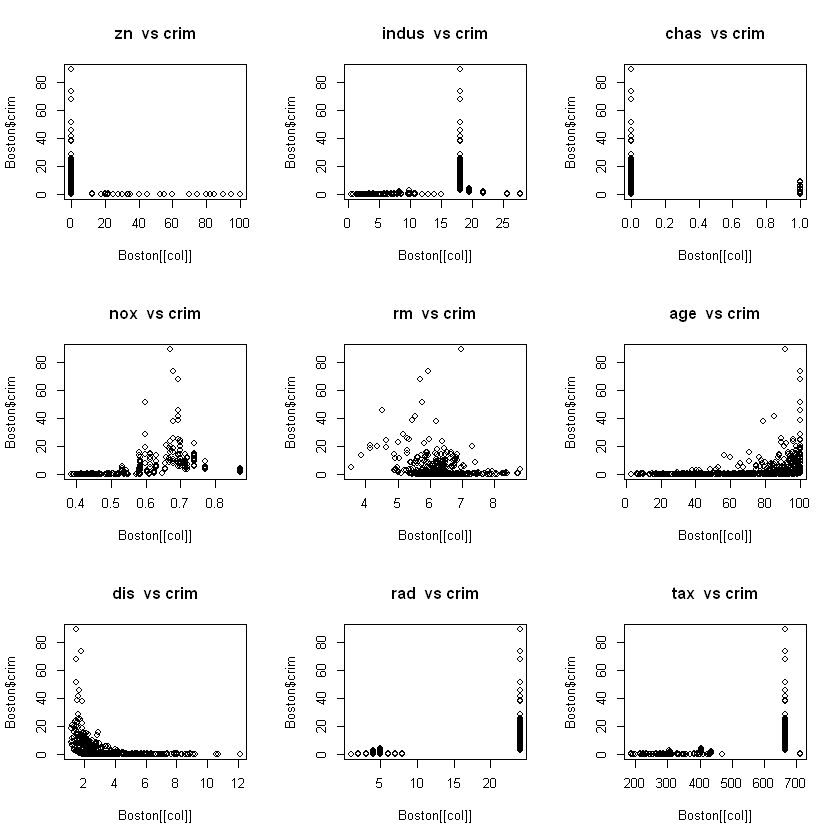

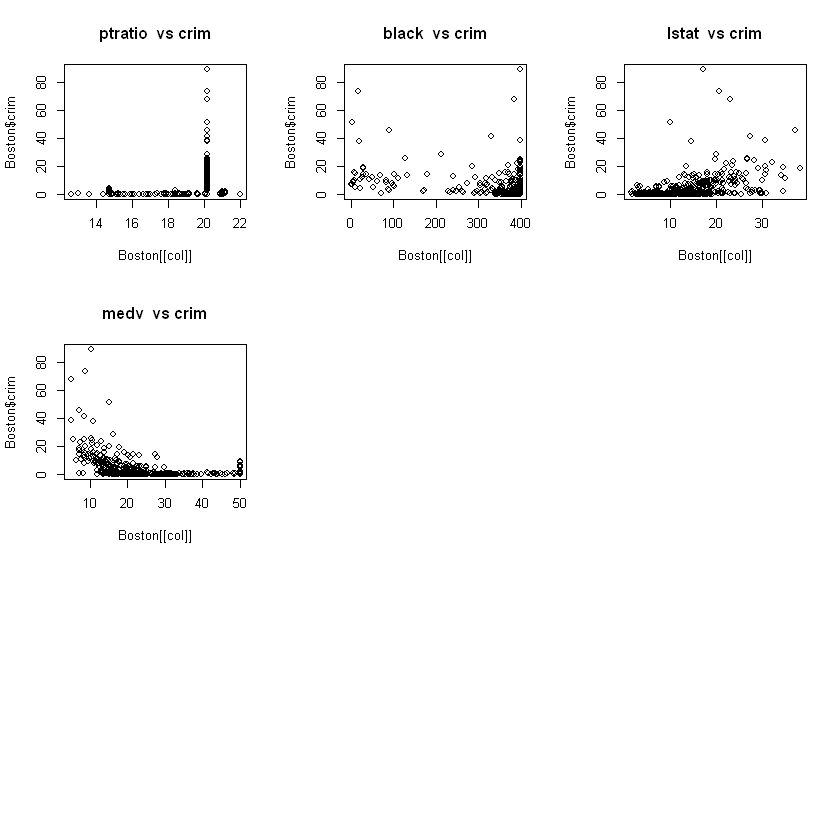

In [82]:
# Fit simple linear regression models for each predictor
lm_results <- lapply(colnames(Boston)[-1], function(col) {
  lm(paste("crim ~", col), data = Boston)
})

# Get the summary of the models
lm_summaries <- lapply(lm_results, summary)
print(lm_summaries)

# Plot the significant predictors against the response
par(mfrow = c(3, 3))
for (col in colnames(Boston)[-1]) {
  plot(Boston[[col]], Boston$crim)
  abline(lm_results[[col]])
  title(paste(col, " vs crim"))
}


(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis Ho: Bj = 0?


*The results of the multiple regression model show that:*

*- The residuals range from -9.924 to 75.051 with a median of -0.353*

*- Of the predictors, the following are significant at the 0.05 level: "zn", "dis", "rad", "black", and "medv".*

*- The coefficients for these predictors are:*

*"zn": 0.044855, 
"dis": -0.987176, 
"rad": 0.588209, 
"black": -0.007538, 
"medv": -0.198887.*

*- The multiple R-squared is 0.454, indicating that 45.4% of the variance in crime rate can be explained by the predictor variables in the model.*

*- The F-statistic for the model is 31.47, with a p-value of < 2.2e-16, indicating that the overall model is significant.*


*For the multiple regression model, the null hypothesis Ho: Bj = 0 can be rejected for the following predictors:
(Intercept), zn, dis, rad, black, and medv. This is based on the p-values, which are less than 0.05.*

In [84]:
# (b) Fit a multiple regression model using all the predictors
multiple_lm <- lm(crim ~ ., data = Boston)

# Get the summary of the model
multiple_lm_summary <- summary(full_lm)
print(multiple_lm_summary)

# Get the p-values of the predictors
multiple_lm_p_values <- full_summary$coefficients[, 4]
print(multiple_lm_p_values)

# Identify the predictors that can be rejected
multiple_lm_significant_predictors <- names(which(multiple_lm_p_values < 0.05))
print(multiple_lm_significant_predictors)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [122]:
single_lm_coefficients <- sapply(lm_results, coef)[2,]
print(single_lm_coefficients)

multiple_lm_coefficients <- multiple_lm_summary$coefficients[-1, 1]
print(multiple_lm_coefficients)

# Create a data frame to store the results of both models
results_df <- data.frame(predictor = names(single_lm_coefficients), 
                         single_lm = single_lm_coefficients, 
                         multiple_lm = multiple_lm_coefficients)

# Plot the results
library(ggplot2)
ggplot(results_df, aes(x = single_lm, y = multiple_lm, label = predictor)) + 
  geom_point() + 
  geom_text(nudge_y = 0.05, check_overlap = TRUE) + 
  xlab("Univariate Regression Coefficients") + 
  ylab("Multiple Regression Coefficients") + 
  ggtitle("Comparison of Univariate and Multiple Regression Coefficients") + 
  theme_classic()

 [1] -0.07393498  0.50977633 -1.89277655 31.24853120 -2.68405122  0.10778623
 [7] -1.55090168  0.61791093  0.02974225  1.15198279 -0.03627964  0.54880478
[13] -0.36315992
           zn         indus          chas           nox            rm 
  0.044855215  -0.063854824  -0.749133611 -10.313534912   0.430130506 
          age           dis           rad           tax       ptratio 
  0.001451643  -0.987175726   0.588208591  -0.003780016  -0.271080558 
        black         lstat          medv 
 -0.007537505   0.126211376  -0.198886821 


ERROR: Error in data.frame(predictor = names(single_lm_coefficients), single_lm = single_lm_coefficients, : arguments imply differing number of rows: 0, 13


(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the formY = Bo+B1X + B2X2 + B3X3 + €.